# Task 1: Prediction using Supervised ML
## Author: Rohit Poddar

In [1]:
#Importing all the necessary Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
#Reading the data from remote link
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Knowing about the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Knowing the basic statistics of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


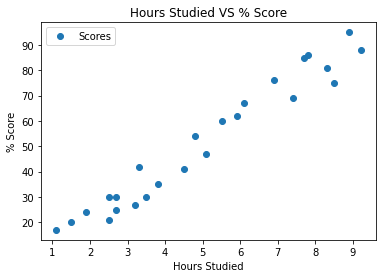

In [5]:
#Plotting the data
data.plot(x="Hours", y="Scores",style="o")
plt.xlabel("Hours Studied")
plt.ylabel("% Score")
plt.title("Hours Studied VS % Score")
plt.show()

**We can see that there is a positive relationship between no. of hours studied and % score obtained**

## Linear Regression

In [6]:
#preparing the data
x=data.iloc[:,[0]].values
y=data.iloc[:,[1]].values

In [7]:
#splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=123)

In [8]:
#training the regression model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

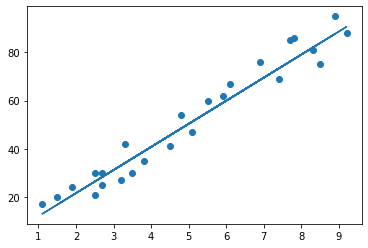

In [9]:
#forming the regression line
reg_line=reg.intercept_ + x * reg.coef_
plt.scatter(x,y)
plt.plot(x,reg_line)
plt.show

In [10]:
#predicting the model and comparing it with actual scores
y_pred=reg.predict(x_test)
data_pred=pd.DataFrame(np.concatenate((x_test,y_test,y_pred),axis=1),columns=["Hours","Actual_Scores","Predicted_Scores"])
data_pred

,Hours,Actual_Scores,Predicted_Scores
0,1.5,20.0,16.805592
1,4.8,54.0,48.443888
2,3.8,35.0,38.856526
3,6.1,67.0,60.907459
4,8.9,95.0,87.752074
5,8.3,81.0,81.999657
6,5.5,60.0,55.155042
7,5.9,62.0,58.989987


In [11]:
#predicting the score if the student studies for 9.25 hrs/day
h=9.25
pred_score=reg.predict([[h]])
print('If a student studies for',h,'hrs it is estimated that he/she will score',round(pred_score[0,0],3))

If a student studies for 9.25 hrs it is estimated that he/she will score 91.108


In [12]:
#evaluating the model
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R Squared Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.350267480006002
R Squared Score: 0.9549410139157178
